# Project 8 - Hypothesis Testing

## Incomplete Data 

Creating accurate predictions is one of the most valuable skills in the job market today. Statisticians, economists, and data scientists use data gathered from specific populations in order to predict the future. Through computational and statistical techniques, we can make _statistical inferences_ to draw conclusions from data that are often incomplete.

As far as estimations of parameters that already exist, having full population data would mean that our questions about that population are answered. But because the cost of gathering a full set of information typically outweigh the benefits of having perfectly accurate data, we are okay with use data samples to draw inferences about past data and predict future observations. 

In [1]:
import numpy as np
import pandas as pd


mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [2]:
mutual_fund_data["Category3"].value_counts()

Large cap                 88
Mid cap                    9
Health care                1
Communication Services     1
Small cap                  1
Name: Category3, dtype: int64

In [3]:
mutual_fund_data["Morningstar Rating"].value_counts(normalize = True)

3.0    0.432990
4.0    0.350515
5.0    0.195876
2.0    0.020619
Name: Morningstar Rating, dtype: float64

In [4]:
mutual_fund_data.groupby("Category3").mean()

,Morningstar Rating
Category3,
Communication Services,5.000000
Health care,5.000000
Large cap,3.658824
Mid cap,4.000000
Small cap,4.000000


In [5]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
mutual_fund_dict = {}
symbols = list(mutual_fund_data["Symbol"])
start = datetime(1980, 1, 1)
end = datetime(2020, 1, 1)
print((start, end, symbols))

(datetime.datetime(1980, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 0, 0), ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX'])


In [6]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end)

[*********************100%***********************]  100 of 100 completed


In [7]:
close_data = fund_data["Adj Close"]
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730549,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733575,...,0.580032,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751738,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097595,43.498638,33.953682,41.269051,41.468189,28.316502,28.111414,38.230667,38.514614,51.184906,...,42.597168,80.298599,43.188065,32.569065,106.341026,29.883808,43.968906,14.698990,29.131348,36.265900
2019-12-26,38.185307,43.719612,34.099636,41.387012,41.586231,28.408522,28.203421,38.318680,38.603237,51.416252,...,42.654209,80.374329,43.536549,32.785183,107.248009,30.146881,44.383232,14.812882,29.243481,36.535660
2019-12-27,38.211609,43.711113,34.099636,41.441456,41.640713,28.400156,28.186691,38.345093,38.629818,51.465828,...,42.504475,80.290184,43.512787,32.761169,107.316467,30.130440,44.357864,14.819583,29.243481,36.501934


In [8]:
close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_16660/2240962843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]


In [9]:
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730549,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733575,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751738,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097595,43.498638,33.953682,41.269051,41.468189,28.316502,28.111414,38.230667,38.514614,51.184906,...,80.298599,43.188065,32.569065,106.341026,29.883808,43.968906,14.698990,29.131348,36.265900,3223.379883
2019-12-26,38.185307,43.719612,34.099636,41.387012,41.586231,28.408522,28.203421,38.318680,38.603237,51.416252,...,80.374329,43.536549,32.785183,107.248009,30.146881,44.383232,14.812882,29.243481,36.535660,3239.909912
2019-12-27,38.211609,43.711113,34.099636,41.441456,41.640713,28.400156,28.186691,38.345093,38.629818,51.465828,...,80.290184,43.512787,32.761169,107.316467,30.130440,44.357864,14.819583,29.243481,36.501934,3240.020020


In [10]:
for year in range(1980, 2021):
    year = str(year)
    print(close_data.loc[str(year)].shape[0])

253
253
253
253
253
252
253
253
253
252
253
253
254
253
252
252
254
253
252
252
252
248
252
252
252
252
251
251
253
252
252
252
250
252
252
252
252
251
251
252


KeyError: '2020'

<AxesSubplot:xlabel='Date'>

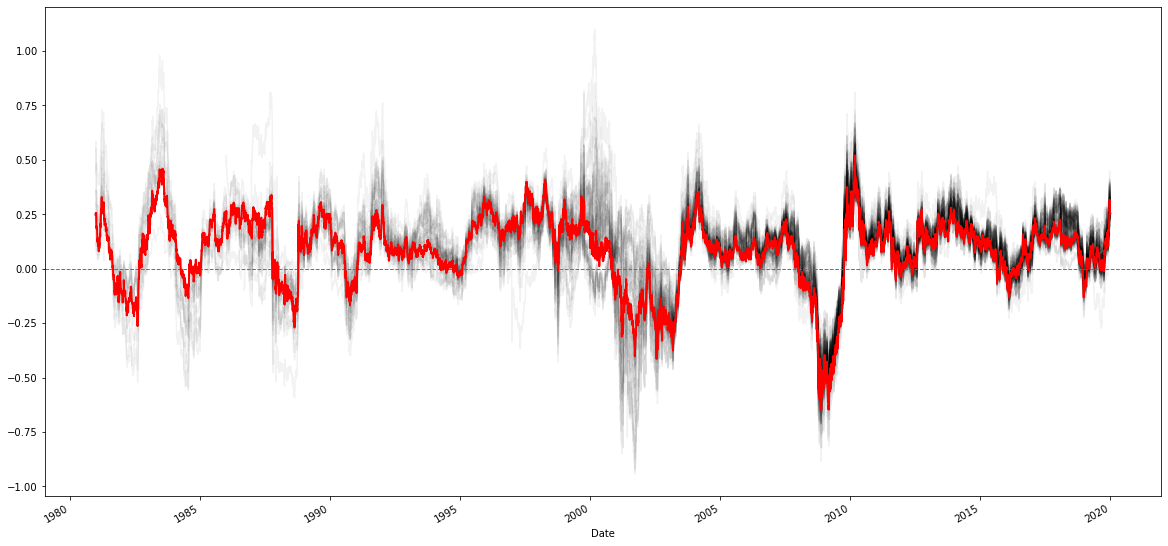

In [11]:
import matplotlib.pyplot as plt
# year over year rates of change are easier to interpret
yoy_return = np.log(close_data).diff(251)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = 0.05, ax = ax)
ax.axhline(0, ls = "--", color = "C2", linewidth = 1)
yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)

In [13]:
monthly_close_data = close_data.resample("M").first()
monthly_close_data.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,35.126408,39.759941,30.990499,39.542530,39.713707,25.792034,25.624294,35.268581,35.559998,46.166386,...,76.018013,40.260967,30.476664,99.783806,27.435658,39.930313,13.367850,26.328794,33.576424,2953.560059
2019-09-30,35.185398,38.784580,30.445381,40.388550,40.560371,25.256033,25.087616,35.319336,35.611183,45.121582,...,74.580856,39.150578,30.370665,97.703735,26.914335,38.901051,13.186357,25.675346,32.912350,2906.270020
2019-10-31,35.645607,38.633919,30.624964,39.771664,39.951832,25.128031,24.959454,35.779793,36.065327,45.679520,...,73.918167,39.294098,29.346062,96.186295,26.883209,39.103664,13.086224,26.262711,32.483128,2940.250000
2019-11-30,36.493099,40.663940,31.833954,40.644115,40.824951,26.328035,26.144949,36.630493,36.913815,48.072186,...,76.337387,40.850147,30.045624,100.013985,28.065918,41.202702,13.774641,27.672400,33.916561,3066.909912
2019-12-31,36.976173,41.718601,32.544643,40.555992,40.745579,27.064035,26.873867,37.106865,37.385193,49.166862,...,77.942223,41.703712,31.162086,102.793091,28.867357,42.458881,14.081302,28.127613,34.872189,3113.870117


In [15]:
monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012487,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005741,-0.005979,-0.009413,...,-0.004088,0.003007,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003612,-0.003640
2019-09-30,0.001678,-0.024837,-0.017746,0.021170,0.021095,-0.021001,-0.021167,0.001438,0.001438,-0.022891,...,-0.019086,-0.027967,-0.003484,-0.021066,-0.019184,-0.026115,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012953,0.012672,0.012289,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023497,0.051211,0.038718,0.021699,0.021619,0.046650,0.046403,0.023498,0.023254,0.051054,...,0.032204,0.038836,0.023559,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013151,0.025605,0.022079,-0.002171,-0.001946,0.027571,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020680,0.036485,0.027408,0.028155,0.030032,0.022019,0.016316,0.027786,0.015196


# T-test

**One Sample T-test:** The one sample t test compares the mean of your sample data to a known value. For example, we can compare a given funds average monthly return to some arbitrary value, like 7% or 10%. 
<h3 align="center">
    <font size="6">
        $t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
    
    
   - Null Hypothesis: sample mean is the same as hypothesized or theoretical mean
   - Alternative Hypothesis: sample mean is different from the hypothesized or theoretical mean
   - $\bar{X}$ is the sample mean 
   - $ \mu$ is the hypothesized value
   - $ \frac{s}{\sqrt{n}}$ is the standard error of the mean. The standard error of the mean is the standard deviation of the t-distribution with a given degrees of freedom. 

In [21]:
import scipy.stats as stats

In [22]:
def t_value_1samp(data, mu):
    x_bar = np.mean(data)
    s = np.std(data)
    n = len(data)
    df = n - 1
    t = (x_bar - mu) / (s/np.sqrt(n))
    
    # these are for the p-value calculations later on
    return t, df

In [23]:
sp500 = monthly_returns["S&P 500"].dropna()

In [24]:
sp500.mean()*12

0.08473776816463623

In [25]:
hypothesized_rate = 0.07/12
hypothesized_rate

0.005833333333333334

In [27]:
t_value_1samp(data = sp500, mu = hypothesized_rate)

#(t value, degrees of freedom for test)

(0.6072595645765047, 478)

In [32]:
stats.ttest_1samp(sp500, hypothesized_rate)

# using stats that we imported and it returns the T statistic and the p-value
# we will not reject H0 since it is high

Ttest_1sampResult(statistic=0.6066253507590067, pvalue=0.5443875720700815)

**Independent Samples T-test:** The The independent samples t test (also called the unpaired samples t test) helps you to compare the means of two sets of data that came from different sources. Normally, we are checking to see if the means of the data are significantly different from a differnece of zero. But , we can also check if they are significantly different from a hypothesized or theoretical value. For instance, say we had two groups of males and one group of females and we wanted to compare average heights between the groups. For the males, we would check to see if they differed significantly from an average height difference of zero, whereas when comparing the males to the females we may want to see if they were significantly different from an average difference of 2 inches. **This hypothesized difference, $(\mu_1 - \mu_2)$, will usually be zero, but not always.**

<h3 align="center">
    <font size="6">
        $ t = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1 - \mu_2)}{\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}}$
    </font>
    </h3> 
    
   
   - Note that this t-test is one variation of the independent samples t-test that _does not_ assume equal variance between the samples
   
    - Null Hypothesis: sample mean is the same as hypothesized or theoretical mean
    - Alternative Hypothesis: sample mean is different from the hypothesized or theoretical mean
    

In [36]:
# independent samples t-test, setting equal_var=True will turn this test into a paired samples t-test where equal variance
# is assumed
def t_value_ind_samples(a, b, hypothesized_difference=0, equal_var=False):
    
    a = np.array(a)
    b = np.array(b)
    
    s1, n1 = np.var(a) , len(a)
    s2, n2 = np.var(b),  len(b)
    
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return t, df

In [37]:
prgfx = monthly_returns["PRGFX"].dropna()
sp500.mean(), prgfx.mean()

# comparing the mean of two independent samples

(0.0070614806803863525, 0.00712472877127286)

In [38]:
t_value_ind_samples(sp500, prgfx)

(-0.021224928580954112, 950.1085878298517)

**Paired Samples T-test:** A paired t test (also called a correlated pairs t-test, a paired samples t test or dependent samples t test) is where you run a t test on dependent samples. Dependent samples are essentially connected — they are tests on the same person or thing. This would be useful for us if we were doing some sort of scientific treatment to the same population - not something that is done to mutual funds. For our function, we can simply add an optional argument "equal_var" to our independent t-test funtion which will cause it to act like a paired samples t-test. 


### The T Probability Distribution
When comparing two samples drawn from a population with unknown parameters, we return a t-value(defined below) similar to the z-value, and a corresponding degrees of freedom, indicating the size of our samples. If the size of our samples is high, we can have more confidence in our result. The t-distribution is defined as: 

<h3 align="center">
    <font size="6">
        $ f(T) = \frac{(1 + \frac{T^2}{\nu})^{\frac{-(\nu+1)}{2}}}{B(0.5,0.5\nu)\sqrt(\nu)}$
    </font>
    </h3> 

    
- Where $\nu$ is the degrees of freedom of the distribution and B is the beta function, which is beyond the scope of this book and can be pulled from the scipy.stats library. 
- This is the same distribution shown in the previous chapter; the Cauchy has one degree of freedom and the Standard normal is the form of the t-distribution with more than 30 degrees of freedom

We can implement this distribution in code: 

In [39]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

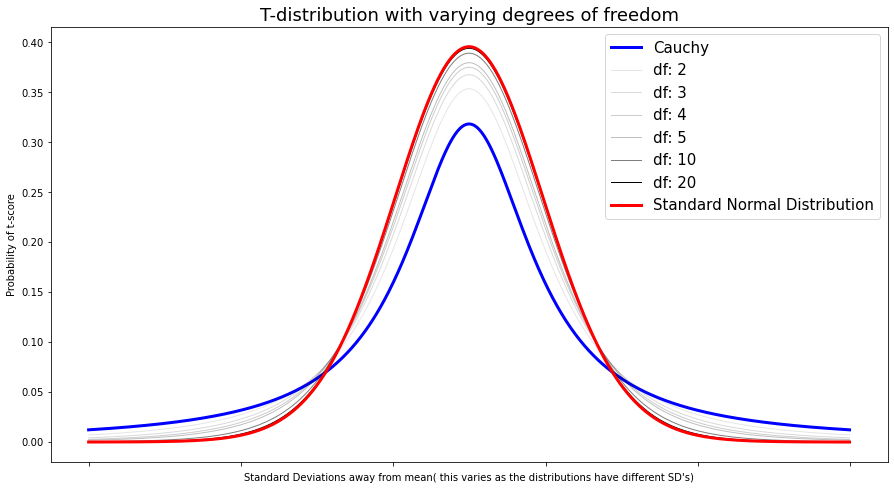

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x = np.linspace(-5, 5, 1000)
cauchy = t_distribution(1, x)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = t_distribution(30, x)
ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()

### T-distribution p-value

As we can see, a lower sample size, and hence a lower degrees of freedom, leads to a lower probaility that our t-score is near 0 when our population means are the same, because more random variation is likely when the sample size is so low. The point of a t-score is to determine if the difference in the two means of the samples is too drastic for the true population means to be the same. As we approach 30 with our degrees of freedom, the graph doesnt change much, and this is a standard normal distribution, which the z-score uses. Some textbooks say you can use z-score for large sample sizes; it will give nearly the same answer. 

Once we get our t-score, we plug it into the equation shown below to get it's p-value. The equation uses the t-distributions's __Cumulative Density Function__. This distribution models the probability that the random variable $T$ takes at most the value $t$. We get a corresponding __p-value__, shown on the y-axis. This value is the probability of our gotten t-value if the true means were the same. 

<h3 align="center">
    $ p =  2 \cdot (1-CDF_{t_{n-1}}(|t|)) $
<h3> 

In [41]:
x = np.linspace(-5, 5, 1000)

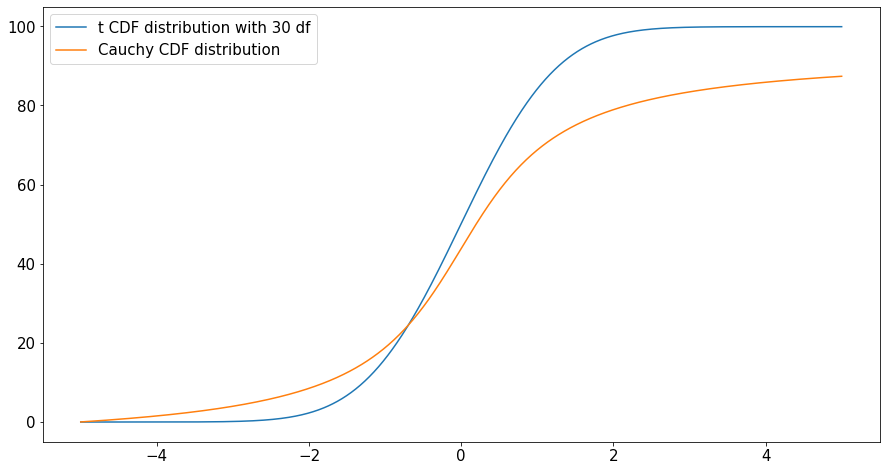

In [42]:
fig, ax = plt.subplots(figsize = (15,8))

t_dist = t_distribution(150000, x)
cauchy = t_distribution(1, x)

f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

for i in range(len(x)):
    f_dist[i] += f_dist[i-1]
    cauchy_f_dist[i] += cauchy_f_dist[i-1]
    
ax.plot(x, f_dist, label = 't CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label = 'Cauchy CDF distribution')

plt.legend()

# Master Function of the t-tests

In [43]:
import scipy.stats as stats

# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_value_1samp(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
    else:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."
        
    return return_string

In [44]:
hypothesized_rate = 0.07/12
t_test(sp500, hypothesized_rate, 'one_sample')

0.6072595645765047 478


'T-value: 0.6072595645765047, P-value: 0.5439676244389173, Fail to reject null hypothesis.'

## Testing for Normality

Statistical tests commonly generate a t-statistic whose interpretation must be drawn from a t-distribution. Next, let's test to see if the data used in chapter 4 follows the assumption that observations fit  a normal distribution. 

### Jarque-Bera Normality Test

The Jarque-Bera test considers whether or not a distribution's skewness and kurtosis match the skewness and kurtosis of a normal distribution:

$$t = \frac{n}{6}[S^2 + \frac{(K-3)^2}{4}]$$

The t-statistic represents the result of the test of the null hypothesis that the sample tested is not normally distributed with a given skewness and kurtosis. Notice that the skewness and kurtosis values control for the standard deviation of the distribution. Thus, despite the fact that the distributions are not identical, when controlling for the size of the standard deviation, they appear close of enough to being normally distributed that the test rejects the null hypothesis.

In [45]:
from stats import * 
def jarque_bera_test(series, use_sample_ks = False):
    series.dropna(inplace = True)
    print(series)
    n = series.shape[0]

    k = kurtosis(series, sample = use_sample_ks)
    s = skewness(series, sample = use_sample_ks)
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    df = n - 1
    print(k, s, t)
    p = scipy.stats.t.sf(t, df=df)
    return t, p

In [49]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

start = datetime(2012, 1 , 1)
end = datetime.today()

stock_data = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA", '^GSPC']
for key in stocks:
    stock_data[key] = web.DataReader(key, 'yahoo', start, end)["Close"]
stock_data = pd.DataFrame(stock_data).rename(columns = {"^GSPC":"S&P500"})
price_change_data = np.log(stock_data).diff()
price_change_data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MSFT: ValueError("time data 'yahoo' does not match format '%Y-%m-%d'")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: ValueError("time data 'yahoo' does not match format '%Y-%m-%d'")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PG: ValueError("time data 'yahoo' does not match format '%Y-%m-%d'")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TSLA: ValueError("time data 'yahoo' does not match format '%Y-%m-%d'")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^GSPC: ValueError("time data 'yahoo' does not match format '%Y-%m-%d'")


,MSFT,AAPL,PG,TSLA,S&P500
Date,,,,,


In [50]:
for key, val in price_change_data.items():
    print(key)
    print("My JB Function:   ", jarque_bera_test(val))
    print("scipy JB Function:", jarque_bera(val)[:2])

MSFT
Series([], Name: MSFT, dtype: float64)


ZeroDivisionError: division by zero

## Confidence Intervals

The confidence interval gives us the range of values that have a $1-\alpha$ probability of containing the population mean, based off of our sample mean. Confidence intervals, as hypothesis tests do, make use of the standard error of the mean of a sample. For a sample with mean $\bar{x}$, the confidence interval lower and upper bounds, respectively, are found by these formulas: 
<h3 align="center">
    <font size="4">
        $ CI = {\bar{x} - t_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}, \bar{x} + t_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
- Where $t_{\frac{\alpha}{2}}$ is the $1-\frac{\alpha}{2}$ quantile of the $t_{n-1}$ distribution

This function can be easily built in code using the _percent point function_ in Scipy. This function gives the percentage of the t distribution behind a given point. This is also known as the quintile. We first make a function to return the quintile in a t distribution associated with a given df and alpha level, and then make a function to make confidence interval for passed data: 

In [52]:
def t_quintile(df, alpha):
    q = (1.0+alpha)/2
    a = stats.t.ppf(q, df)
    return a

In [53]:
def confidence_intervals(data, alpha):
    n = len(data)
    df = n - 1
    x_bar = np.mean(data)
    SE = np.std(data) / np.sqrt(n)
    CI_quintile = t_quintile(df, alpha)
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE
    return CI

In [54]:
sp500_CI = confidence_intervals(sp500, 0.05)
sp500_CI

(0.006934593241426297, 0.007188368119346408)

In [55]:
sp500_yearly_CI = (1 + sp500_CI[0]) ** 12, (1 + sp500_CI[1]) ** 12
sp500_yearly_CI

(1.0864634873490415, 1.0897538656572028)

In [56]:
yearly_close_data = pd.DataFrame(close_data).resample("Y").first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,0.097941,0.121479,0.107516,NaN,0.123749,0.125251,0.130137,0.129860,0.093210,...,0.130998,0.135191,0.109603,0.094992,0.111440,0.098801,0.084267,0.116717,0.130834,0.116434
2016-12-31,NaN,0.034507,-0.027854,0.013937,0.008688,-0.004140,-0.006373,-0.039964,-0.041698,0.019134,...,0.046649,0.073910,0.048352,0.082509,0.028135,0.043593,0.026901,-0.043783,0.060857,-0.022375
2017-12-31,NaN,0.108929,0.156921,0.104077,0.105245,0.111734,0.109688,0.151742,0.149828,0.140938,...,0.084670,0.096364,0.012293,0.043827,0.069597,0.073705,0.054890,0.148116,0.025143,0.114947
2018-12-31,0.152800,0.235910,0.182138,0.259875,0.260812,0.205085,0.203352,0.165565,0.164093,0.212739,...,0.224042,0.229419,0.327968,0.315654,0.263689,0.277257,0.243151,0.153747,0.274512,0.177295
2019-12-31,-0.027555,-0.043299,-0.077403,0.052536,0.053575,-0.032740,-0.034801,-0.028523,-0.030323,-0.077350,...,-0.034572,-0.011837,-0.009790,0.004878,-0.020775,-0.002644,-0.054439,-0.093813,-0.005056,-0.071404


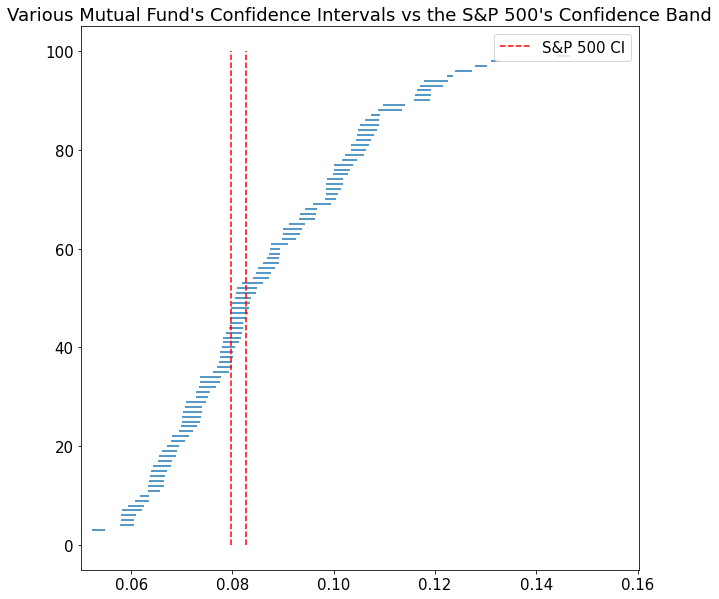

In [59]:
yearly_return_CIs = confidence_intervals(yearly_changes, 0.05)

fig, ax = plt.subplots(figsize = (10, 10))
Y_axis = np.arange(len(yearly_return_CIs[0]))

ax.hlines(y = Y_axis, xmin = yearly_return_CIs[0].sort_values(), xmax = yearly_return_CIs[1].sort_values() )
ax.vlines(x = [yearly_return_CIs[0]["S&P 500"],yearly_return_CIs[1]["S&P 500"]], ymin = 0, ymax = 100, label = "S&P 500 CI", color="r", linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_xlim(0.05)
ax.legend()

# ANOVA

While using T-tests and Z-tests to analyze means of groups, we were restricted to only being able to compare two groups at a time. What if we wanted to see of there was significant differences between more than two groups? The **ANOVA**, or **Analysis of Variance** techniques allow us to test the null hypothesis that there is no significant difference between $k$ (some integer larger than 2) groups. 

- $H_o$: $\mu_1 = \mu_2 = \cdots = \mu_k$
- $H_a$: At least two of the means are not equal. 

#### Mutual Fund Categories
For our motivating example, we will continue to use our mutual fund data, but we must be able to group our mutual funds into categories. Luckily, the dataset contains a column labeled "Morningstar Category", which is assigned by [Morningstar](http://im.mstar.com/im/newhomepage/Morningstar_Category_Definitions_US_June_2016.pdf) based off of a funds previous holdings statistics and tries to give investors information about a fund's risk and investment strategy. 

In [60]:
mutual_fund_data[["Symbol", "Morningstar Category"]]

,Symbol,Morningstar Category
0,AGTHX,Large Growth
1,FCNTX,Large Growth
2,CWMAX,Large Blend
3,CWMCX,Large Blend
4,CWMEX,Large Blend
...,...,...
95,FDTRX,Large Growth
96,FDYZX,Large Growth
97,BBVLX,Large Value
98,PEYAX,Large Value


In [61]:
mutual_fund_data["Morningstar Category"].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [62]:
mutual_fund_data["Morningstar Category"].value_counts() > 2

Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: Morningstar Category, dtype: bool

In [63]:
fund_types = mutual_fund_data["Morningstar Category"].value_counts() > 2
fund_types

Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: Morningstar Category, dtype: bool

In [64]:
relevant_fund_types = fund_types[fund_types]
relevant_fund_types

Large Growth      True
Large Value       True
Large Blend       True
Mid-Cap Growth    True
Name: Morningstar Category, dtype: bool

In [65]:
relevant_funds = mutual_fund_data[mutual_fund_data["Morningstar Category"].isin(relevant_fund_types.index)]
relevant_funds

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [66]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds["Symbol"][relevant_funds["Morningstar Category"] == fund_type]

In [68]:
relevant_fund_type_names

{'Large Growth': 0     AGTHX
 1     FCNTX
 9     AMCFX
 10    CAFAX
 11    CAFCX
 12    CAFEX
 13    CAFFX
 14    FMACX
 15    TRBCX
 22    FDGRX
 23    FBGRX
 24    AMCPX
 25    EAGRX
 27    FMAGX
 28    HACAX
 30    PRGFX
 36    FOCPX
 37    CNGAX
 38    CNGCX
 39    CNGEX
 40    CNGFX
 41    FNEFX
 42    FOCKX
 48    TWCUX
 49    EGFFX
 50    EGFIX
 51    ANEFX
 61    VAFAX
 63    FCGAX
 64    FGSRX
 65    FIFRX
 70    FKGRX
 72    AULDX
 73    AULGX
 74    AULNX
 75    AULRX
 76    AULYX
 77    AKRSX
 78    MFEIX
 79    POLIX
 80    FKDNX
 82    VWUSX
 83    LSGRX
 84    SEEGX
 91    SBLYX
 92    AKRIX
 93    MFEGX
 94    FDNRX
 95    FDTRX
 96    FDYZX
 99    TWCGX
 Name: Symbol, dtype: object,
 'Large Value': 16    AFMFX
 17    AMRFX
 18    CMLAX
 19    CMLCX
 20    CMLEX
 21    CMLFX
 26    AMRMX
 43    DFLVX
 44    CDDRX
 45    CDDYX
 46    CDIRX
 47    CVIRX
 52    HLIEX
 59    DDFIX
 60    DDFRX
 66    PRFDX
 69    VWNFX
 81    MADVX
 97    BBVLX
 98    PEYAX
 Name: Symbol, d

In [69]:
fund_type_returns = {}

for key in relevant_fund_type_names.keys():
    fund_type_returns[key] = []
    for val in relevant_fund_type_names[key]:
        fund_type_returns[key].extend(monthly_returns[val].dropna())

In [70]:
[print(f"{key}: {np.mean(fund_type_returns[key])}") for key in fund_type_returns]

Large Growth: 0.008346027019413456
Large Value: 0.0070251384954381395
Large Blend: 0.00741082562040395
Mid-Cap Growth: 0.009292539869203108


[None, None, None, None]

### Assumptions needed for ANOVA
There are three assumptions that must be met in order to carry out an ANOVA test: 

1. The experimental errors of the data are normally distributed
2. Homoscedasticity - the variances of your factors are all roughly the same (and at least follow the same distribution)
3. Samples are independent - Selection of one sample had no effect on any other sample

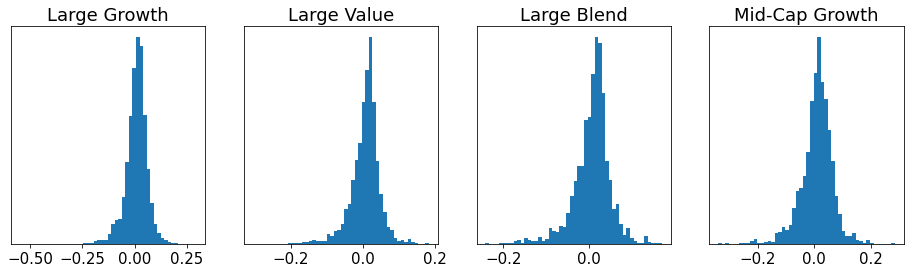

In [71]:
fig, axs = plt.subplots(1, 4 , figsize = (16, 4))
for num, key in enumerate(fund_type_returns): 
    axs[num].hist(fund_type_returns[key], bins = 50)
    axs[num].set_title(key)
    axs[num].set_yticks([])

## F-Statistic
The distribution used for the hypothesis test is a new one. It is called the F distribution, named after Sir Ronald Fisher, an English statistician. The F-statistic is a ratio. There are two sets of degrees of freedom; one for the numerator and one for the denominator. 

The F distribution is derived from the t-distribution. The values of the F distribution are squares of the
corresponding values of the t-distribution. One-Way ANOVA expands the t-test for comparing more than two groups.
The scope of that derivation is beyond the level of this textbook. 

To calculate the F ratio, two estimates of the variance are made:

1. **Variance between samples**: An estimate of $\sigma^2$ that is the variance of the sample means multiplied by n (when the sample sizes are the same.). If the samples are different sizes, the variance between samples is weighted to account for the different sample sizes. The variance is also called **variation due to treatment or explained variation.**

2. **Variance within samples**: An estimate of $\sigma^2$ that is the average of the sample variances (also known as a pooled variance). When the sample sizes are different, the variance within samples is weighted. The variance is also called **the variation due to error or unexplained variation.**

- $SS_b$ = the sum of squares that represents the variation among the different samples

- $SS_w$ = the sum of squares that represents the variation within samples that is due to chance.

To find a "sum of squares" means to add together squared quantities that, in some cases, may be weighted. We used sum of squares to calculate the sample variance and the sample standard deviation. 

MS means "mean square." $MS_b$ is the variance between groups, and $MS_w$ is the variance within groups. These measurements are the total sum of squares of their variances divided by the degrees of freedomom of the measure to give a mean value. 

#### Calculating the F-Statistic

#### Counting Statistics
In order to accurately calculate the _Mean sum of squares_ we need to have denominator to divide the _total sum of squares_ by. For the sum of squares between groups, this is one minus the number of groups, and for the sum of squares within groups, this is the total number of observations minus the number of groups.

- $k$ = the number of different groups
- $n_j$ = the size of the $j^{th}$ group
- $N$ = total number of all the values combined (total sample size: $\sum{n_j}$)
- $df$'s for the numerator(between samples): $df_b = k – 1$
- $df$'s for the denominator($df$'s within samples): $df_w = k – 1$ 

These counting measures can be packaged into one function and demonstrated with our mutual fund categories: 

In [72]:
def get_anova_counts(*args):
    k = len(args)
    N = 0
    for arg in args:
        N += len(arg)
    dfbn = k - 1
    dfwn = N - k

    return k, N, dfbn, dfwn

In [73]:
get_anova_counts(fund_type_returns["Large Growth"],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])

(4, 23079, 3, 23075)

#### Sum of Squares Between Groups
- Explained variation: sum of squares representing variation among the different samples:

    - $SS_{b} = \sum_{j = 1}^{k}{n_j(\bar{x_j} - \bar{x})^2}$
    
    
This measures the _total_ variation between the samples. For each group passed, the mean of all values is subtracted from the mean of the group, and that value is squared, then multiplied by the size of each group, because the measure must be scaled to the size of the group to capture the total sum of squares. 

## SSB

In [77]:
def SSB(*args):
    ssb = 0
    alldata = np.concatenate(args)

    grand_mean = np.mean(alldata)

    for arg in args:
        group_mean = np.mean(arg)

        n = len(arg)
        val = n * (group_mean - grand_mean)**2

        ssb += val

    return ssb

In [78]:
SSB(fund_type_returns["Large Growth"], fund_type_returns['Large Value'],
    fund_type_returns['Large Blend'], fund_type_returns['Mid-Cap Growth'])

0.009868753265762902

- Unexplained variation: sum of squares representing variation within samples:

    - $SS_w = \sum_{j = 1}^{k}{\sum_{i = 1}^{n_j}{(x_i - \bar{x_j})^2}}$
    
This measure adds up the squared difference between all observations in a group and that individual group's mean. This function will iterate once for each individual observation in the groups, much more than SSB which only iterates once for each group.

## SSW

In [79]:
def SSW(*args):
    ssw = 0
    for arg in args: 
        group_mean = np.mean(arg)
        val = 0 
        for i in arg:
            val += np.sum(i - group_mean)**2
        ssw += val
    return ssw

In [80]:
SSW(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

53.803155914578134

 - Total variation across the dataset: 

    - $SS_t = SS_b + SS_w$
    
This is a measure of the total sum of squares in the dataset. Simply an addition of SSB and SSW. 

# SST

In [81]:
def get_sum_square_stats(*args): 
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

In [82]:
get_sum_square_stats(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

(53.803155914578134, 0.009868753265762902, 53.8130246678439)

## Creating ANOVA Table

In [83]:
from scipy.stats import f as f_dist
def finish_anova(f, dfwn, dfbn): 
    # use scipy to plug f-value into f distribution to return p-value
     p_value =  1 - f_dist.cdf(f, dfwn, dfbn)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

In [84]:
def anova(*args):

    k, N, dfbn, dfwn  = get_anova_counts(*args)
    
    ssw, ssb, sst = get_sum_square_stats(*args)

    msb = ssb / dfbn
    msw = ssw / dfwn
    f = msb / msw

    return finish_anova(f, dfbn, dfwn)

In [85]:
anova(fund_type_returns["Large Growth"],
      fund_type_returns['Large Value'],
      fund_type_returns['Large Blend'],
      fund_type_returns['Mid-Cap Growth'])

'F-value: 1.4108310050871762, P-value: 0.23745809957724484, Fail to reject null hypothesis.'